In [47]:
import pandas as pd
import numpy as np 

data = pd.read_csv('Cars93.csv')

### Drop unnecessary columns and empty values

In [48]:
data.drop(['Make','Man.trans.avail','Origin','AirBags','Unnamed: 0'],axis=1,inplace=True)
data.dropna(inplace=True)

#separate independent and dependent variables
y = data['MPG.highway']
x = data.drop('MPG.highway',axis=1)


### Create dummy variables for categorical values

In [50]:
# create dummy for categorical values
data_dummy = pd.get_dummies(x.select_dtypes(include='object'),drop_first=True)
# non categorical columns
columns_numeric = x.select_dtypes(include=np.number)
# merge the columns
X = pd.concat([columns_numeric,data_dummy],axis=1 )

In [51]:
X

,Min.Price,Price,Max.Price,MPG.city,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,...,Type_Large,Type_Midsize,Type_Small,Type_Sporty,DriveTrain_Front,DriveTrain_Rear,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8
0,12.9,15.9,18.8,25,1.8,140,6300,2890,13.2,5,...,0,0,1,0,1,0,1,0,0,0
1,29.2,33.9,38.7,18,3.2,200,5500,2335,18.0,5,...,0,1,0,0,1,0,0,0,1,0
2,25.9,29.1,32.3,20,2.8,172,5500,2280,16.9,5,...,0,0,0,0,1,0,0,0,1,0
3,30.8,37.7,44.6,19,2.8,172,5500,2535,21.1,6,...,0,1,0,0,1,0,0,0,1,0
4,23.7,30.0,36.2,22,3.5,208,5700,2545,21.1,4,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,8.7,9.1,9.5,25,1.8,81,5500,2550,12.4,4,...,0,0,1,0,1,0,1,0,0,0
89,17.6,20.0,22.4,21,2.0,134,5800,2685,18.5,5,...,0,0,0,0,1,0,1,0,0,0
90,22.9,23.3,23.7,18,2.8,178,5800,2385,18.5,4,...,0,0,0,1,1,0,0,0,1,0
91,21.8,22.7,23.5,21,2.3,114,5400,2215,15.8,5,...,0,0,0,0,0,1,1,0,0,0


In [52]:
import sklearn.model_selection

# split dataset
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.25,train_size=0.75,random_state=0)

In [53]:
from sklearn import linear_model

#linear regression
reg = sklearn.linear_model.LinearRegression()
reg.fit(X_train,y_train)
y_predicted = reg.predict(X_test)

### Plotting

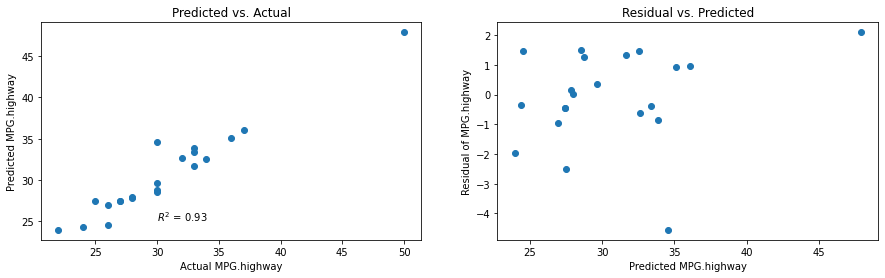

In [54]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2,figsize=(15,4))
ax[0].scatter(x=y_test,y=y_predicted)
ax[0].set_title('Predicted vs. Actual')
ax[0].set_xlabel('Actual MPG.highway')
ax[0].set_ylabel('Predicted MPG.highway')
#ax[0].set_ylim([20,55])
#ax[0].set_xlim([20,55])
#ax[0].plot(y_test, reg.intercept_ + reg.coef_ * y_test, label=line, color='red') #plot trend line
ax[0].text(30,25,f'$R^2$ = {round(reg.score(X_test,y_test),2)}') # print out R^2 values

#plot residual
residual = list(map(lambda x,y: x-y,y_test,y_predicted))
ax[1].scatter(x=y_predicted,y=residual)
ax[1].set_title('Residual vs. Predicted')
ax[1].set_xlabel('Predicted MPG.highway')
ax[1].set_ylabel('Residual of MPG.highway')

plt.show()

## Print equation using coefficients

In [55]:
str=[]
for i in range(len(reg.coef_)):
    str.append(f'{round(reg.coef_[i],2)}x{i}')
eq = f'y={round(reg.intercept_,2)}+'+ '+'.join(str)
eq

'y=-1.17+0.05x0+-0.02x1+-0.02x2+0.86x3+-0.23x4+0.01x5+0.0x6+-0.0x7+-0.04x8+-0.58x9+0.03x10+0.12x11+0.05x12+0.02x13+-0.19x14+0.4x15+-0.0x16+0.49x17+1.05x18+0.32x19+0.86x20+1.02x21+0.28x22+-0.79x23+-0.58x24+-0.54x25+-0.8x26+0.15x27+-0.31x28+0.17x29+-0.0x30+-0.32x31+-0.34x32+0.47x33+0.66x34+-1.76x35+-0.92x36+-1.07x37+-0.13x38+0.0x39+0.66x40+-0.67x41+1.65x42+-0.01x43+0.51x44+-0.23x45+1.19x46+0.06x47+1.64x48+-0.18x49+-0.98x50+-0.13x51+1.05x52+0.6x53+0.24x54+-0.0x55+-0.67x56+-0.75x57+-0.82x58+-0.26x59+0.4x60+0.0x61+-0.23x62+-1.76x63+-0.83x64+2.31x65+0.0x66+0.95x67+-0.71x68+-0.44x69+0.28x70+0.53x71+0.0x72+0.29x73+0.0x74+-0.11x75+-0.08x76+0.01x77+0.0x78+0.0x79+0.0x80+0.77x81+0.77x82+0.0x83+0.0x84+-1.77x85+0.34x86+0.0x87+-1.04x88+-0.1x89+-0.05x90+0.57x91+0.0x92+-0.7x93+1.35x94+0.0x95+0.0x96+-1.02x97+-0.58x98+-0.75x99+-0.81x100+0.0x101+-0.92x102+0.59x103+1.19x104+1.16x105+0.0x106+0.0x107+0.0x108+0.0x109+-0.63x110+-0.32x111+1.65x112+0.0x113+0.0x114+0.85x115+0.6x116+-0.6x117+-0.54x118+-0.2x119+0.1

In [44]:
sklearn.metrics.r2_score(y_test,y_predicted)

0.9299165285766069

In [45]:
reg.score(X_test,y_test)

0.9299165285766069

In [46]:
reg.score(X_train,y_train)

1.0